In [1]:
import sys
import os
sys.path.append(os.path.abspath(".."))  # 如果 notebook 在 your_project/notebooks 里


from data.market_data import OKXDataFetcher
from score_system.scanner import Scanner
from utils.plots import plot_kline_chart,plot_executed_trades
from strategy.buy_signal import BuySignal
from strategy.sell_signal import SellSignal
import warnings

warnings.filterwarnings("ignore")

In [2]:
okx_data_fetcher = OKXDataFetcher()
scanner = Scanner()

In [3]:
#scanner.scan_strong_symbols(volume_threshold=1.0, kline_limit=30, max_symbols=50)

In [4]:
df = okx_data_fetcher.get_kline('KMNO-USDT-SWAP',bar='1H')

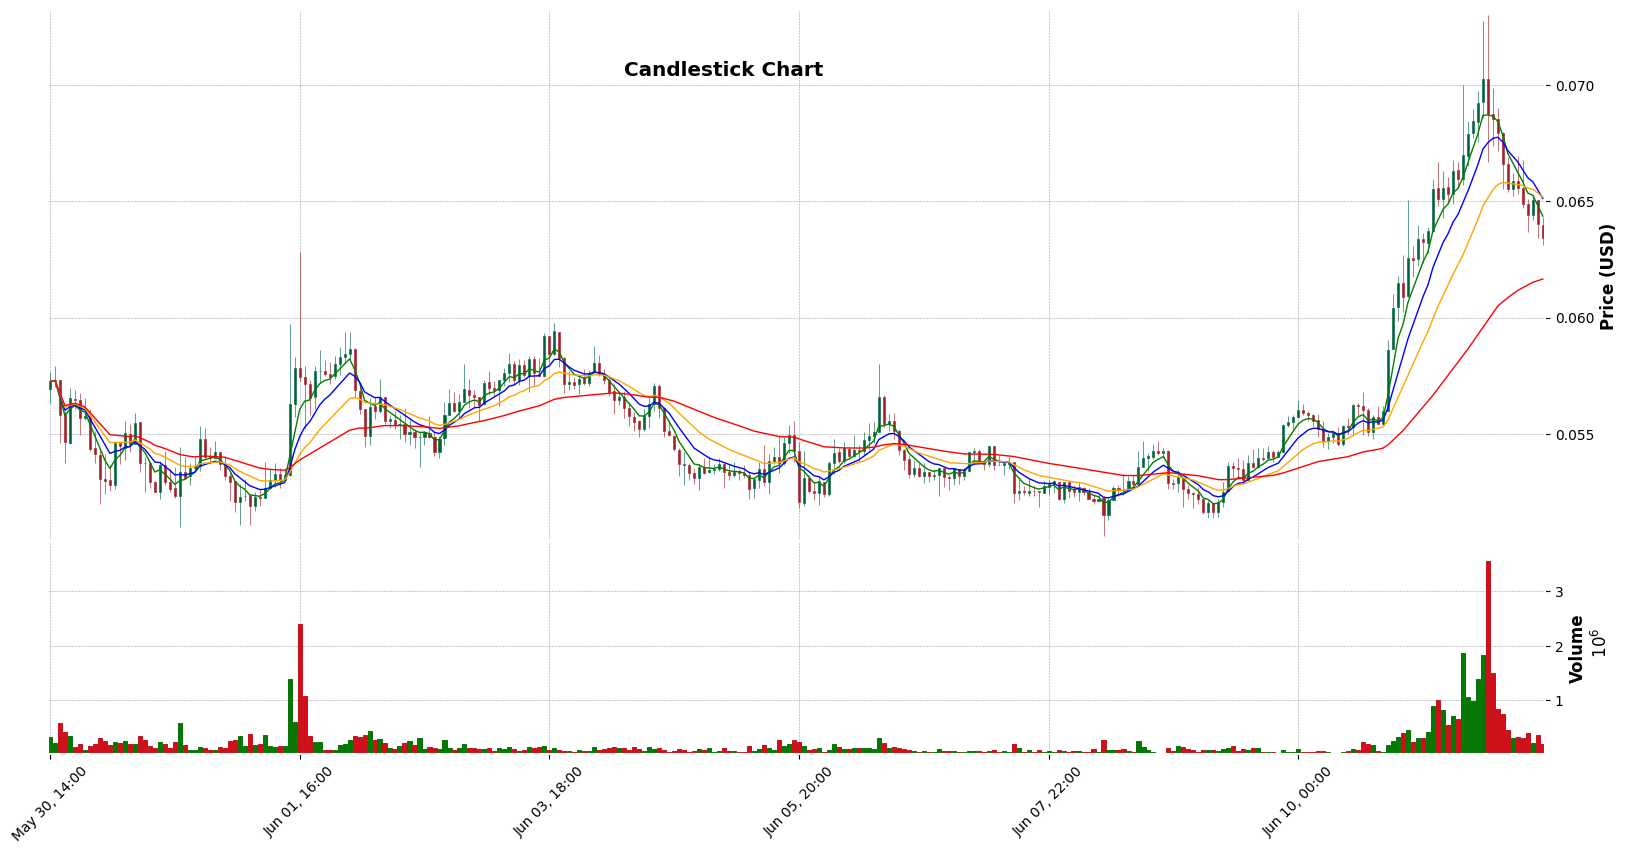

In [5]:
plot_kline_chart(df)

In [6]:
bs = BuySignal()
ss = SellSignal()

df_signal = bs.detect_dizijue_entry(df)
df_signal = ss.detect_exit_signal_full(df_signal)

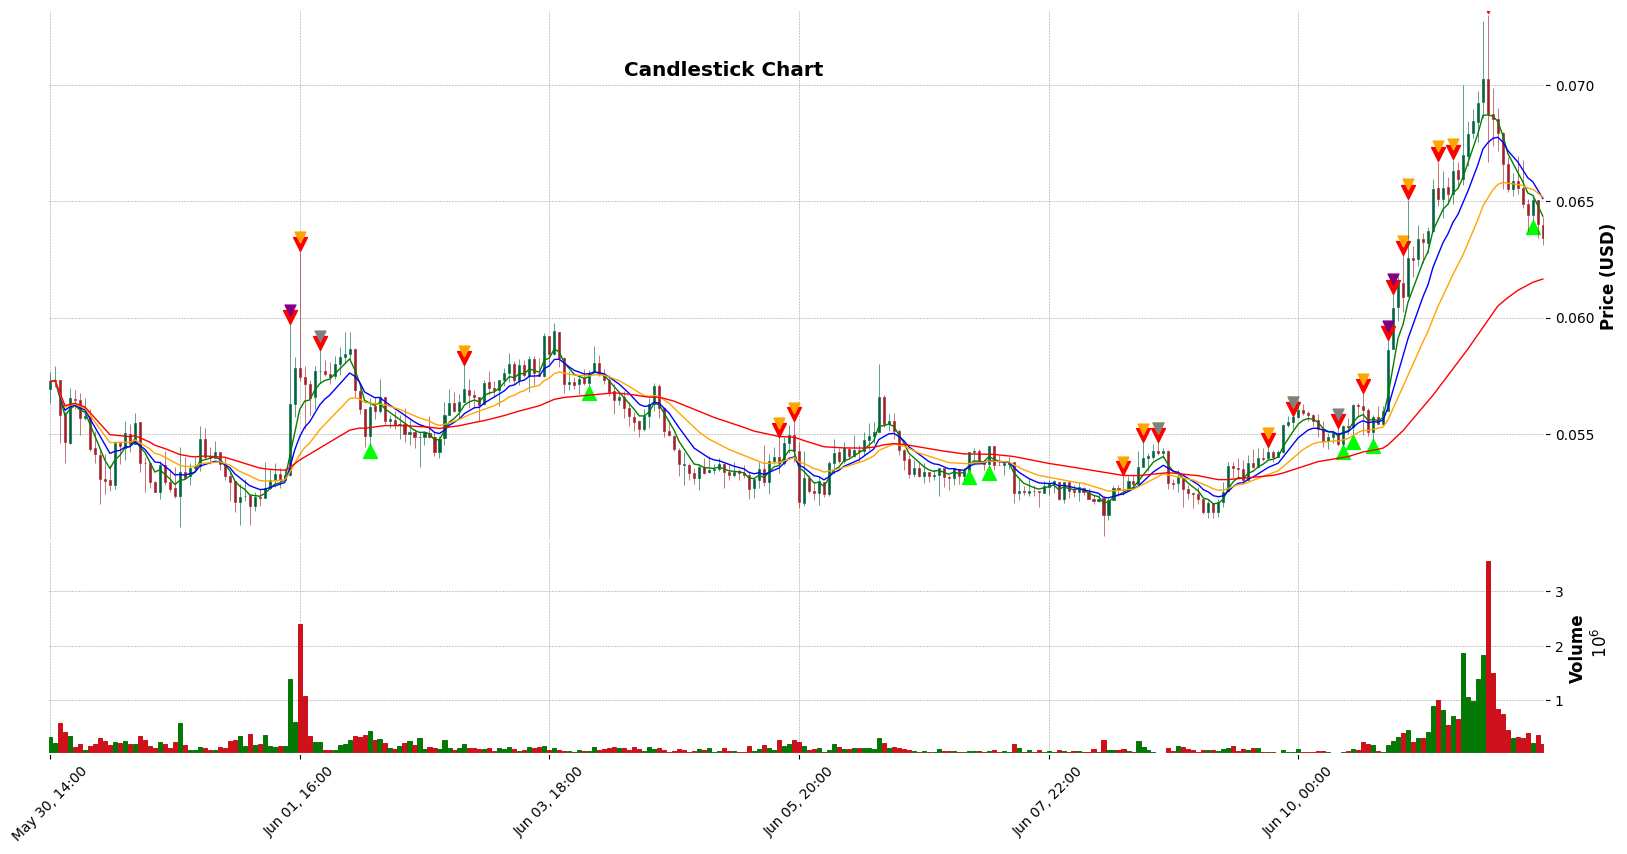

In [7]:
plot_kline_chart(df_signal)


=== Performance Summary ===
Final Capital: $5252.18
Total Return: $252.18
Max Drawdown: $5365.23
Trades Executed: 17
Win Rate: 29.41%


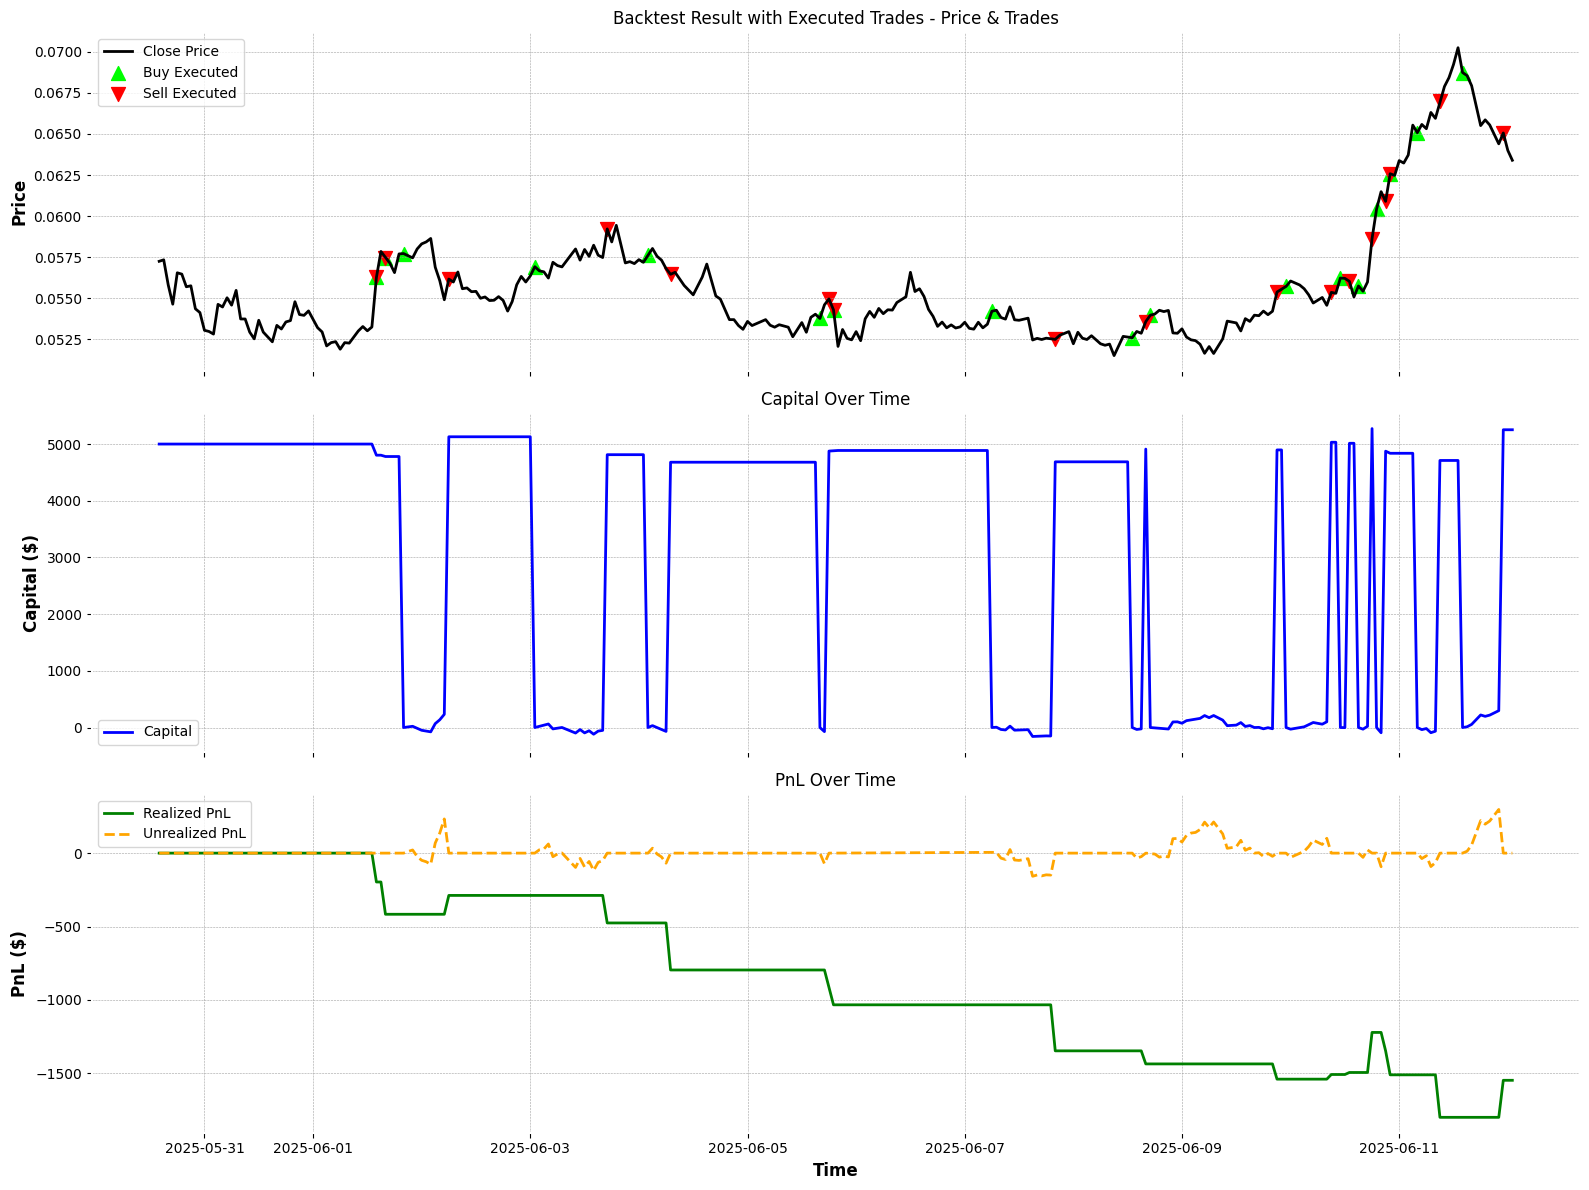

In [8]:
from execution.execution import ExecutionEngine

engine = ExecutionEngine()
result_df = engine.run_backtest(df_signal)
plot_executed_trades(result_df)